In [ ]:



import nltk
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud

from sklearn.utils import resample






import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
import seaborn as sns
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import cohen_kappa_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from __future__ import print_function
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.sklearn_api import TfIdfTransformer
import codecs
import numpy as np
import logging
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing

from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing




In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('music_dataset.csv', error_bad_lines=False)

print(df.head())

print( df.tail())

print( df.columns)


print( len( df) ) 


b'Skipping line 3444: expected 31 fields, saw 46\nSkipping line 4525: expected 31 fields, saw 41\nSkipping line 8926: expected 31 fields, saw 37\nSkipping line 13121: expected 31 fields, saw 36\nSkipping line 14078: expected 31 fields, saw 37\nSkipping line 18631: expected 31 fields, saw 41\nSkipping line 21790: expected 31 fields, saw 53\nSkipping line 24868: expected 31 fields, saw 56\nSkipping line 28137: expected 31 fields, saw 45\nSkipping line 30322: expected 31 fields, saw 39\n'


  Unnamed: 0           artist_name  ...       topic  age
0          0                mukesh  ...     sadness  1.0
1          4         frankie laine  ...  world/life  1.0
2          6           johnnie ray  ...       music  1.0
3         10           pérez prado  ...    romantic  1.0
4         12  giorgos papadopoulos  ...    romantic  1.0

[5 rows x 31 columns]
      Unnamed: 0 artist_name  ...    topic       age
45762      82447     mack 10  ...  obscene  0.014286
45763      82448      m.o.p.  ...  obscene  0.014286
45764      82449        nine  ...  obscene  0.014286
45765      82450  will smith  ...  obscene  0.014286
45766      82451       jeezy  ...  obscene  0.014286

[5 rows x 31 columns]
Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perception

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,13,15,18,21,23,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

print( df )
df = df.loc[  : ,  [  "lyrics" , "topic" ] ]

print( df )
# print( data ) 
# print( data["topic"].unique() )
# data.dropna( )
# print( data["topic"].unique() )

print(  df['topic'].value_counts()  )




      Unnamed: 0           artist_name  ...       topic       age
0              0                mukesh  ...     sadness  1.000000
1              4         frankie laine  ...  world/life  1.000000
2              6           johnnie ray  ...       music  1.000000
3             10           pérez prado  ...    romantic  1.000000
4             12  giorgos papadopoulos  ...    romantic  1.000000
...          ...                   ...  ...         ...       ...
45762      82447               mack 10  ...     obscene  0.014286
45763      82448                m.o.p.  ...     obscene  0.014286
45764      82449                  nine  ...     obscene  0.014286
45765      82450            will smith  ...     obscene  0.014286
45766      82451                 jeezy  ...     obscene  0.014286

[45767 rows x 31 columns]
                                                  lyrics       topic
0      hold time feel break feel untrue convince spea...     sadness
1      believe drop rain fall grow believe 

In [ ]:

data = df.to_numpy()

print( data[ 0 , 0 ] )

hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel


# **Preprocessing and Cleaning**

In [ ]:

def preprocessing_cleaning( data , flg_stemm=False, flg_lemm=True   ):

  for x in range( len( data ) ):  

    data_row = str ( data[x , 0 ] ).lower()                                # convert to lower case 
    tokenizer = RegexpTokenizer(r'\w+')                                         # remove Punctuation and special characters 
    tokens = tokenizer.tokenize( data_row )                                # Remove stop words 

    # print( tokens)
    # data_row_words = [w for w in tokens if not w in stopwords.words('english')]
    # return " ".join(filtered_words)
                                                      #                Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        data_row_words = [ps.stem(word) for word in tokens]
        
                                                        #                Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        data_row_words = [lem.lemmatize(word) for word in tokens]

    data[ x , 0 ]  = data_row_words

  return data  



In [ ]:

data = preprocessing_cleaning( data )


# **Partitioning our Data**

In [ ]:
lyrics = [ ]
topic =  [ ]
for x in range( len( data ) ):

  if( len( data[x , 0 ] ) >= 100 ):
    token = data[ x , 0 ]
    lyrics.append(    token[ 0: 100]  ) 
    topic.append(  data[x , 1 ] )

print(   len ( lyrics   )  )




10035


In [ ]:
df = pd.DataFrame(   list( zip ( lyrics , topic))     ,   columns= [ "lyrics" , "topic" ]  )

print( df.head)

print( len( df ) )

print(  df['topic'].value_counts()  )


<bound method NDFrame.head of                                                   lyrics       topic
0      [piece, mindin, world, knowin, life, come, bri...  world/life
1      [better, sail, midnight, better, dive, pearl, ...     obscene
2      [come, motherfucker, spit, shit, minute, chill...     obscene
3      [hahaha, alright, yeah, alright, even, shoot, ...  world/life
4      [light, bright, dark, shit, backstage, alright...    violence
...                                                  ...         ...
10030  [want, catch, lookin, thing, thingcheck, bring...     obscene
10031  [whoo, come, black, mib, come, mib, come, blac...    violence
10032  [boom, come, baby, boom, come, baby, boom, com...     obscene
10033  [doin, turf, punk, message, smokey, smokey, sm...     obscene
10034  [hook, country, boy, country, walk, country, t...     obscene

[10035 rows x 2 columns]>
10035
obscene       4327
violence      2178
world/life    1234
sadness        935
music          526
night/time    

# **Balancing our Dataset (DownSampling Majority Class)**

In [ ]:
# Separate majority and minority classes
df_violence =   df [ df.topic == "violence" ]
df_sadness =    df[df.topic == "sadness" ]
df_world_life = df[df.topic == "world/life" ]
df_obscene =    df[df.topic == "obscene"   ]
df_music =      df[df.topic == "music" ]
df_night_time = df[df.topic == "night/time" ]
df_romantic =   df[df.topic == "romantic" ]
df_feelings =   df[df.topic == "feelings" ]
 
 
# print( df_violence.head(  ))
 
print( )
print( len( df_violence ) , len( df_sadness )  , len( df_world_life ) ,len( df_obscene ), len( df_music ), len( df_night_time ), len( df_romantic )
,  len( df_feelings )   )
 
# df_violence = np.array( df_violence ) 
 
 
 
# df_minority = df[df.balance==1]
 
# Downsample majority class
df_violence_majority_downsampled = resample(df_violence, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
 
df_sadness_majority_downsampled = resample(df_sadness, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
                              
df_world_life_majority_downsampled = resample(df_world_life, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
 
df_obscene_majority_downsampled = resample(df_obscene, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
 
df_music_majority_downsampled = resample(df_music, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
 
df_night_time_majority_downsampled = resample(df_night_time, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
                    
                 
df_romantic_time_majority_downsampled = resample(df_romantic, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results

df_feelings_majority_downsampled = resample(df_feelings, 
                                 replace=False,    # sample without replacement
                                 n_samples= 191 ,     # to match minority class
                                 random_state=123 ) # reproducible results
             
 
# print( len( df_violence_majority_downsampled )  )
 
 
 
df_downsampled = pd.concat([   df_violence_majority_downsampled  ,  df_sadness_majority_downsampled   , df_world_life_majority_downsampled ,
  df_obscene_majority_downsampled ,  df_music_majority_downsampled  ,    df_night_time_majority_downsampled  ,   df_romantic_time_majority_downsampled ,
   df_feelings_majority_downsampled  ])
 
 
print( len( df_violence_majority_downsampled ) , len( df_sadness_majority_downsampled )  , len( df_sadness_majority_downsampled )
 ,len( df_obscene_majority_downsampled ), len( df_music_majority_downsampled ), len( df_night_time_majority_downsampled ), len( df_romantic_time_majority_downsampled )
,  len( df_feelings_majority_downsampled )   ) 
 
# dfff = df_feelings_majority_downsampled.to_numpy()
# print( dfff[100] )




2178 935 1234 4327 526 441 191 202
191 191 191 191 191 191 191 191


In [ ]:
 
our_dataset = df_downsampled.to_numpy()

all_partitions = our_dataset[ : , 0 ]
all_labels = our_dataset[  :  , 1 ]


print( all_partitions[0 ])

print( df_downsampled )

df_downsampled.to_csv( "datasetttt.csv", encoding='utf-8', index=False)

new_all_partitions =  [  ] 
new_all_labels = [  ]

for x in range( len( all_partitions )  ):

  partition_string = " ".join( all_partitions[ x ] )
  new_all_partitions.append( partition_string )
  new_all_labels.append( all_labels[x]  )






['gotta', 'raise', 'little', 'hell', 'young', 'blood', 'like', 'river', 'young', 'blood', 'chain', 'young', 'blood', 'heaven', 'need', 'sinner', 'raise', 'hell', 'saint', 'young', 'blood', 'come', 'start', 'riot', 'care', 'young', 'blood', 'heaven', 'hate', 'sinner', 'gonna', 'raise', 'hell', 'raise', 'hell', 'raise', 'hell', 'somebody', 'gotta', 'gotta', 'raise', 'little', 'hell', 'baby', 'drop', 'bone', 'baby', 'sell', 'soul', 'heaven', 'fare', 'thee', 'somebody', 'gotta', 'gotta', 'raise', 'little', 'hell', 'hell', 'yeah', 'somebody', 'gotta', 'gotta', 'raise', 'little', 'hell', 'hell', 'yeah', 'somebody', 'gotta', 'gotta', 'raise', 'little', 'hell', 'young', 'blood', 'stand', 'deliver', 'need', 'queen', 'young', 'gotta', 'pull', 'trigger', 'world', 'run', 'scar', 'raise', 'hell', 'baby', 'drop', 'bone', 'baby', 'sell', 'soul', 'heaven', 'fare', 'thee', 'somebody', 'gotta']
                                                 lyrics     topic
6620  [gotta, raise, little, hell, young, bl

In [ ]:
!pip install xlsxwriter

In [ ]:
print( str( new_all_partitions) )

print( new_all_labels)

['gotta raise little hell young blood like river young blood chain young blood heaven need sinner raise hell saint young blood come start riot care young blood heaven hate sinner gonna raise hell raise hell raise hell somebody gotta gotta raise little hell baby drop bone baby sell soul heaven fare thee somebody gotta gotta raise little hell hell yeah somebody gotta gotta raise little hell hell yeah somebody gotta gotta raise little hell young blood stand deliver need queen young gotta pull trigger world run scar raise hell baby drop bone baby sell soul heaven fare thee somebody gotta', 'grandiose prose set author scribble code poetic give song prosthetic truth bleed clear mean bellow wrong get sweep peaceful tounge sweat seep graft turn tear lob free think burn concrete watch wrong reach hour pas monitor midi build screen till eye droopy sample sound tire smoothly etch reality routine banality moonbeam stick fence esteem tryna memorise step scheme passive footprint mark phrase bracket 

# **Visualizing our Data**
Word Cloud: is a data visualization chart that describes words which have the highest frequency in our dataset

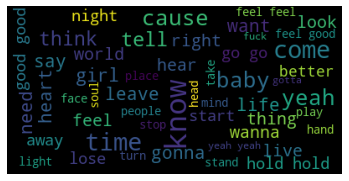

In [ ]:

wc = wordcloud.WordCloud( background_color='black',    max_words=50 ,     max_font_size=35  )
wc = wc.generate(str( new_all_partitions  ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()


# **Splitting Data into Trainging and Test**

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(  new_all_partitions , new_all_labels  ,  test_size=0.3, random_state=42)

print(     len( X_test )  ) 
print( len ( y_test  )  )

print( len( X_train ))
print( len(y_train  ))




459
459
1069
1069


# **Bow and TF_IDF**

In [ ]:
def Bow_Tf_Idf(   book_partitions_list  ):

  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )  # we calculated  bag of words to calculate the frequency of every word of the text.
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)   # we calculated the Term frequency (TF) and Inverse document Frequency (IDF)
  # X_train_tfidf.shape
  return  X_train_tfidf


In [ ]:

tf_idf = Bow_Tf_Idf(  new_all_partitions )
print(   tf_idf.shape )   


(1528, 10579)


# **N-gram**

In [ ]:

def ngram ( book_partitions_list , n ):
  count_vect = CountVectorizer(ngram_range=(1,n)   )
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
  return  X_train_tfidf


In [ ]:

c=ngram( new_all_partitions , 2 )
print(c.shape )

(1528, 81455)


# **LDA**

In [ ]:
def lda(book_partitions_list) :
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  LDA = LatentDirichletAllocation( n_components=7,random_state=42 )
  LDA.fit(X_train_counts)
  return LDA.transform(X_train_counts)

   


In [ ]:

t=lda( new_all_partitions)
t.shape

(1528, 7)

In [ ]:


unique_labels = np.unique( new_all_labels )

print( unique_labels )

['feelings' 'music' 'night/time' 'obscene' 'romantic' 'sadness' 'violence'
 'world/life']


# **Binarizing Target**

In [ ]:




unique_labels = ['feelings'  , 'music' , 'night/time' ,  'obscene' ,  'romantic' ,  'sadness' ,  'violence' , 'world/life'  ]

def Binarizing_Target(   new_all_labels ):

  # unique_labels = np.unique( new_all_labels )

  unique_labels = ['feelings'  , 'music' , 'night/time' ,  'obscene' ,  'romantic' ,  'sadness' ,  'violence' , 'world/life'  ]

  new_all_labels = np.array( new_all_labels ) 
  for label in unique_labels:
    new_all_labels [ new_all_labels  ==  label ]  = int( unique_labels.index( label  ) ) 
  # if type(book_labels_list[0] ) is str:
  return new_all_labels

 

In [ ]:
new_all_labels = Binarizing_Target( new_all_labels )


#**Classification Algorithms**

# **Building Models (SVM, Decision Tree, k-Nearest Neighbor) with TF_IDF**

In [ ]:
def Build_Models( x , y , model_str = "svm" ):
  model_str = str.lower( model_str )
  y = np.array(y)
  model = None
  if model_str == "svm":
    model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)  )    ,           ])
                                        #Training
    model.fit(    x   ,  y )
  elif model_str == "d_tree":
    model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)   ), ] )
                                    #   # fitting the data in the pipe
    model = model.fit( x   ,  y  )
 
  elif model_str == "knn":
    model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', KNeighborsClassifier(n_neighbors=7)   ),         ])
                                                   # Fitting our train data to the pipeline
    model.fit(  x  , y   ) 
  return model

 

# **Computing and Plotting Confusion Matrix**

In [ ]:

def compute_confusion_matrix( actual , predicted  ):
  arr = np.zeros( ( len( book_names) , len( book_names) )  )
  print( len( book_names)  )
  for x in range( len( actual ))  :
      arr[ actual[x] , predicted[x] ] += 1
  return np.int_( arr )


def plot_confusion_matrix(   confusion_matrix ,  classes ):
  df_cfm = pd.DataFrame( confusion_matrix , index = classes, columns = classes)
  plt.figure(figsize = (10,7))
  cfm_plot = sn.heatmap(df_cfm, annot=True)


 

# **Evaluation of Models with TF_IDF**

In [ ]:
def Evaluate_Models(  X_train , y_train , X_test , y_test ):

  model_names = [  "svm"  , "d_tree"   ,     "knn"    ]
  acc=[]

  y_train_binarized = Binarizing_Target( y_train )
  y_test_binarized = Binarizing_Target( y_test )

  y_test_binarized =  [ int (i, base=16) for i in y_test_binarized ]

  #print( y_train_binarized )
  #print(  y_test_binarized )

  models = [ ] 
  for x in  range(len(model_names)) :
    models.append( Build_Models( X_train   , y_train_binarized  ,  model_names[x] )   ) 
    predicted = models[x].predict( X_test )
    predicted = [int(x) for x in predicted]
    acc.append(accuracy_score( y_test_binarized ,   predicted ) )
    print( "Accuracy is     " ,  accuracy_score( y_test_binarized ,   predicted )  )
    confus_mtrix = confusion_matrix(  y_test_binarized ,   predicted )
    print( "Confusion Matrix    \n" , confus_mtrix   ) 
    # plot_confusion_matrix( model  ,   np.array ( partition_test ) ,   np.array( predicted ) )
    # print(  book_names [  int(predicted[0] )  ]  )
    # np.mean( predicted == book_names_bin  )
    plot_confusion_matrix(  confusion_matrix(   y_test_binarized , predicted )  , unique_labels )
    # print(    compute_confusion_matrix(   y_test_binarized , predicted ) )

    
  print( "Highest Accuracy Model is : " +   model_names [ np.argmax(acc) ] )


Accuracy is      0.9019607843137255
Confusion Matrix    
 [[52  0  0  2  0  0  0  0]
 [ 0 45  1  0  0  1  2  0]
 [ 2  0 60  0  1  0  2  0]
 [ 1  2  4 47  0  0  2  0]
 [ 0  0  0  0 67  0  0  0]
 [ 0  0  0  0  1 59  1  3]
 [ 2  2  0  1  3  0 34  3]
 [ 0  2  0  3  2  0  2 50]]
Accuracy is      0.19389978213507625
Confusion Matrix    
 [[27  0  0  0  0  0 27  0]
 [ 2  6  0  0  0  0 41  0]
 [ 4  0  0  0  0  0 61  0]
 [ 1  0  0 12  0  0 43  0]
 [ 1  0  0  0  0  0 66  0]
 [ 0  1  0  0  0  0 63  0]
 [ 0  0  0  1  0  0 44  0]
 [ 0  0  0  1  0  0 58  0]]
Accuracy is      0.7233115468409586
Confusion Matrix    
 [[53  0  0  0  0  0  0  1]
 [ 3 42  2  0  0  0  2  0]
 [ 5  0 56  0  3  0  1  0]
 [ 9  7  6 28  2  1  1  2]
 [ 6  1  2  0 58  0  0  0]
 [ 6  2  6  0  3 46  0  1]
 [14  1  7  0  1  5 14  3]
 [ 5  4  3  0  9  1  2 35]]
Highest Accuracy Model is : svm


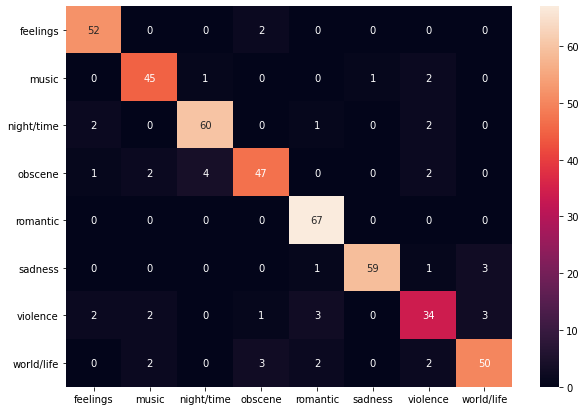

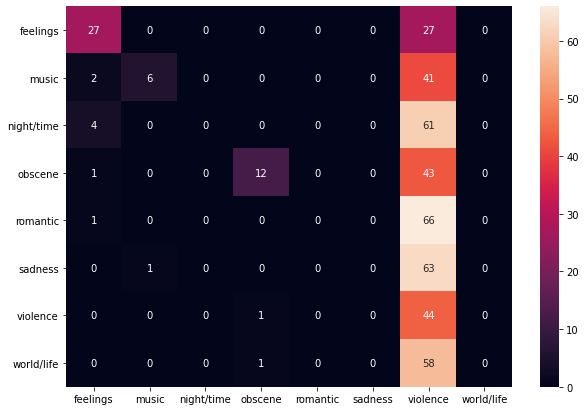

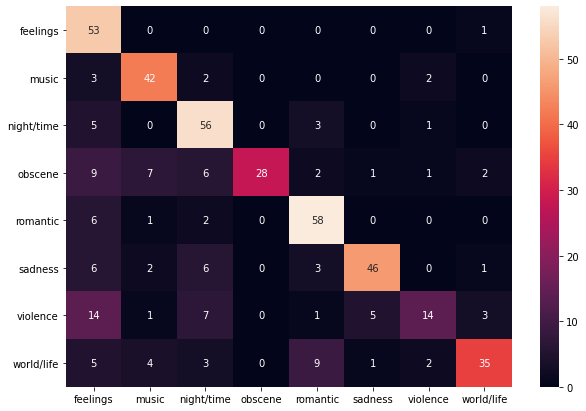

In [ ]:
Evaluate_Models(  X_train , y_train , X_test , y_test  )

# **Evaluation 10-Fold for (SVM , D_Tree , KNN ) with TF_IDF**

In [ ]:

# Models        

svm = SGDClassifier(loss='hinge', penalty='l2',  alpha=1e-3, random_state=42,  max_iter=5, tol=None)
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier(n_neighbors=7)

X_train_tfidf  =  Bow_Tf_Idf(  new_all_partitions )
 
models = [  svm   , d_tree ,  knn  ]
model_names = [ "Support Vector Machine" , "Decision Tree"  ,  "K Nearest Neighbor" ]
Model_scores = [ ]
All_Model_scores_list = [ ] 

Model_accuracy = [ ] 
Model_std = [ ] 

Models_highest_accuracy = [ ]
Models_Less_std = [ ] 
Model_index = [ ]

for x in range( 3 ):
  Model_scores.append ( cross_val_score(  models[x] ,    X_train_tfidf ,  new_all_labels ,   cv = 10, scoring= 'accuracy')  ) 
 
for x in range( len( Model_scores ) ) :

  print(       model_names[ x ]  ,   " Scores is  "  , Model_scores[ x ]  )
  print("Accuracy:   ",  (  Model_scores[ x ].mean()  ,   Model_scores[ x ].std()  )   )
  print( "/////////////////////////////////////////// \n ")
  All_Model_scores_list.append(  Model_scores[ x ] )
  Model_accuracy.append(  Model_scores[ x ].mean()   )
  Model_std.append(     Model_scores[ x ].std()  )


print (  "Champion Model is : " , model_names[ np.argmax( Model_accuracy )  ]  )

print( Model_accuracy )
print( Model_std ) 

Models_highest_accuracy.append(  np.max( Model_accuracy)  )
Models_Less_std.append( np.min( Model_std ) )
Model_index.append(  np.argmax( Model_accuracy )   )

print( All_Model_scores_list )




Support Vector Machine  Scores is   [0.85620915 0.88888889 0.86928105 0.90196078 0.90196078 0.89542484
 0.94771242 0.88235294 0.88157895 0.92105263]
Accuracy:    (0.8946422428620571, 0.024691612608115525)
/////////////////////////////////////////// 
 
Decision Tree  Scores is   [0.24183007 0.22875817 0.20261438 0.26797386 0.22222222 0.24183007
 0.24836601 0.20915033 0.23684211 0.23684211]
Accuracy:    (0.23364293085655316, 0.018074461307620405)
/////////////////////////////////////////// 
 
K Nearest Neighbor  Scores is   [0.73856209 0.69281046 0.74509804 0.71895425 0.7254902  0.69934641
 0.79738562 0.74509804 0.65789474 0.73684211]
Accuracy:    (0.7257481940144479, 0.03549688667272024)
/////////////////////////////////////////// 
 
Champion Model is :  Support Vector Machine
[0.8946422428620571, 0.23364293085655316, 0.7257481940144479]
[0.024691612608115525, 0.018074461307620405, 0.03549688667272024]
[array([0.85620915, 0.88888889, 0.86928105, 0.90196078, 0.90196078,
       0.89542484

([<matplotlib.axis.XTick at 0x7feefea40ed0>,
 [Text(0, 0, 'Support Vector Machine'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'K Nearest Neighbor')])

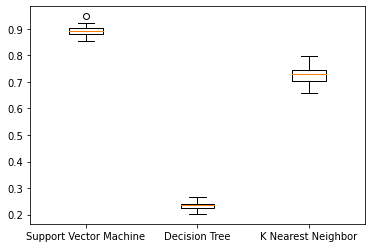

In [ ]:
All_Model_scores_list = np.array( All_Model_scores_list  )
plt.boxplot(   All_Model_scores_list.transpose()   )
ticks = range( 1 , len( model_names)+1 )
plt.xticks(  ticks ,  model_names )


# **Evaluation 10-Fold for (SVM , D_Tree , KNN) with N-Grams**

In [ ]:
# Models        

svm = SGDClassifier(loss='hinge', penalty='l2',  alpha=1e-3, random_state=42,  max_iter=5, tol=None)
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier(n_neighbors=7)

X_train_ngram  =  ngram(  new_all_partitions  , 40 )
 
models = [  svm   , d_tree ,  knn  ]
model_names = [ "Support Vector Machine" , "Decision Tree"  ,  "K Nearest Neighbor" ]
Model_scores = [ ]
All_Model_scores_list = [ ] 



Model_accuracy = [ ] 
Model_std = [ ] 

 
for x in range( 3 ):
  Model_scores.append ( cross_val_score(  models[x] ,    X_train_ngram ,  new_all_labels ,   cv = 10, scoring= 'accuracy')  ) 
 
for x in range( len( Model_scores ) ) :

  print(       model_names[ x ]  ,   " Scores is  "  , Model_scores[ x ]  )
  print("Accuracy: " ,  (  Model_scores[ x ].mean()  ,   Model_scores[ x ].std() )  )
  print( "/////////////////////////////////////////// \n ")
  All_Model_scores_list.append( Model_scores[x] )
  Model_accuracy.append(  Model_scores[ x ].mean()   )
  Model_std.append(   Model_scores[ x ].std()  )
  

print( Model_accuracy )
print( Model_std  )
print (  "Champion Model is : " , model_names[ np.argmax( Model_accuracy )  ]  )


Models_highest_accuracy.append(  np.max( Model_accuracy)  )
Models_Less_std.append( np.min( Model_std ) )
Model_index.append(  np.argmax( Model_accuracy )   )


Support Vector Machine  Scores is   [0.83660131 0.86928105 0.83006536 0.8496732  0.8496732  0.85620915
 0.91503268 0.80392157 0.80921053 0.88815789]
Accuracy:  (0.8507825937392501, 0.03233201751241938)
/////////////////////////////////////////// 
 
Decision Tree  Scores is   [0.24183007 0.24836601 0.19607843 0.26143791 0.24836601 0.24183007
 0.22222222 0.20915033 0.24342105 0.25      ]
Accuracy:  (0.23627020983832128, 0.01943118296275073)
/////////////////////////////////////////// 
 
K Nearest Neighbor  Scores is   [0.67320261 0.67973856 0.67320261 0.68627451 0.70588235 0.67973856
 0.74509804 0.69281046 0.625      0.67763158]
Accuracy:  (0.6838579291365668, 0.028434920514623888)
/////////////////////////////////////////// 
 
[0.8507825937392501, 0.23627020983832128, 0.6838579291365668]
[0.03233201751241938, 0.01943118296275073, 0.028434920514623888]
Champion Model is :  Support Vector Machine


([<matplotlib.axis.XTick at 0x7fef4f19a3d0>,
 [Text(0, 0, 'Support Vector Machine'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'K Nearest Neighbor')])

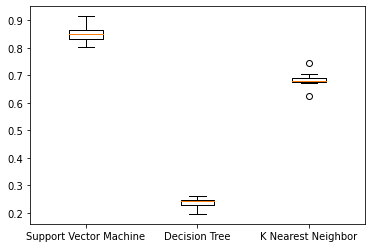

In [ ]:
All_Model_scores_list = np.array( All_Model_scores_list  )
plt.boxplot(   All_Model_scores_list.transpose()   )
ticks = range( 1 , len( model_names)+1 )
plt.xticks(  ticks ,  model_names )


# **Evaluation 10-Fold for (SVM , D_Tree , KNN) with LDA**

In [ ]:



# Models        

svm = SGDClassifier(loss='hinge', penalty='l2',  alpha=1e-3, random_state=42,  max_iter=5, tol=None)
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier(n_neighbors=7)

X_train_lda  =  lda(  new_all_partitions )
 
models = [  svm   , d_tree ,  knn  ]
model_names = [ "Support Vector Machine" , "Decision Tree"  ,  "K Nearest Neighbor" ]
Model_scores = [ ]
All_Model_scores_list = [ ] 


Model_accuracy = [ ] 
Model_std = [ ] 



for x in range( 3 ):
  Model_scores.append ( cross_val_score(  models[x] ,    X_train_lda ,  new_all_labels ,   cv = 10, scoring= 'accuracy')  ) 
 

for x in range( len( Model_scores ) ) :

  print(       model_names[ x ]  ,   " Scores is  "  , Model_scores[ x ]  )
  print("Accuracy: " , (  Model_scores[ x ].mean()  ,   Model_scores[ x ].std() )   )
  print( "/////////////////////////////////////////// \n ")
  All_Model_scores_list.append(  Model_scores[x] ) 
  Model_accuracy.append(  Model_scores[ x ].mean()   )
  Model_std.append(    Model_scores[ x ].std()   )  



print (  "Champion Model is : " , model_names[ np.argmax( Model_accuracy )  ]  )

print(Model_accuracy )
print( Model_std )
Models_highest_accuracy.append(  np.max( Model_accuracy)  )
Models_Less_std.append( np.min( Model_std ) )
Model_index.append(  np.argmax( Model_accuracy )   )



Support Vector Machine  Scores is   [0.19607843 0.26797386 0.23529412 0.2745098  0.20915033 0.20915033
 0.23529412 0.22875817 0.21052632 0.33552632]
Accuracy:  (0.24022617819057449, 0.039962613736088955)
/////////////////////////////////////////// 
 
Decision Tree  Scores is   [0.28104575 0.28104575 0.32026144 0.2745098  0.24836601 0.30718954
 0.30718954 0.25490196 0.30921053 0.28289474]
Accuracy:  (0.2866615067079463, 0.022760390162760394)
/////////////////////////////////////////// 
 
K Nearest Neighbor  Scores is   [0.38562092 0.35947712 0.40522876 0.44444444 0.30065359 0.37254902
 0.40522876 0.38562092 0.32894737 0.42763158]
Accuracy:  (0.38154024767801864, 0.04136813835229407)
/////////////////////////////////////////// 
 
Champion Model is :  K Nearest Neighbor
[0.24022617819057449, 0.2866615067079463, 0.38154024767801864]
[0.039962613736088955, 0.022760390162760394, 0.04136813835229407]


([<matplotlib.axis.XTick at 0x7fef4dc7da10>,
 [Text(0, 0, 'Support Vector Machine'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'K Nearest Neighbor')])

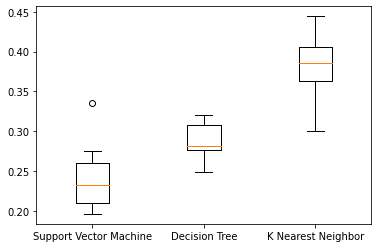

In [ ]:
All_Model_scores_list = np.array( All_Model_scores_list  )
plt.boxplot(   All_Model_scores_list.transpose()   )
ticks = range( 1 , len( model_names)+1 )
plt.xticks(  ticks ,  model_names )


# **Error Analysis**
So After running K-Fold on SVM , KNN , Decision Tree. We find that the highest mean accuracy is the Support Vector Machine. So, we consider the SVM as the champion Model.

Accuracy is      0.9019607843137255
Confusion Matrix    
 [[52  0  0  2  0  0  0  0]
 [ 0 45  1  0  0  1  2  0]
 [ 2  0 60  0  1  0  2  0]
 [ 1  2  4 47  0  0  2  0]
 [ 0  0  0  0 67  0  0  0]
 [ 0  0  0  0  1 59  1  3]
 [ 2  2  0  1  3  0 34  3]
 [ 0  2  0  3  2  0  2 50]]


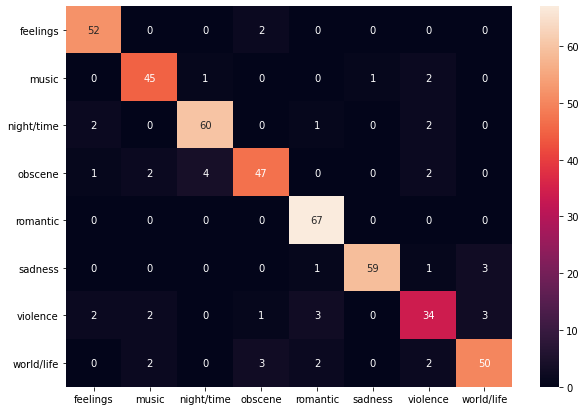

In [ ]:


y_train_binarized = Binarizing_Target( y_train )
y_test_binarized = Binarizing_Target( y_test )

y_train_binarized =  [ int (i ) for i in y_train_binarized ]
y_test_binarized =  [ int (i ) for i in y_test_binarized ]
  
  
model = ( Build_Models( X_train   , y_train_binarized  ,  "svm" )   ) 

predicted = model.predict( X_test)
predicted = [int(x) for x in predicted]
accuracy_scores = accuracy_score( y_test_binarized ,   predicted ) 
print( "Accuracy is     " ,  accuracy_score( y_test_binarized ,   predicted )  )
confus_mtrix = confusion_matrix(  y_test_binarized ,   predicted )
print( "Confusion Matrix    \n" , confus_mtrix   ) 


plot_confusion_matrix(  confusion_matrix(   y_test_binarized , predicted )  , unique_labels )
# print(    compute_confusion_matrix(   y_test_binarized , predicted ) )


In [ ]:
error_partition =  [ ]
error_books = [ ] 
def detect_misclassified( actual , predicted  ):


  print( len( actual ) ) 
  print( len( predicted ) ) 
  error_partition = [ ]
  for x in range( len( actual ))  :
    if(   actual[x] !=  predicted[x] ):

      print( "Misclassified = " ,  unique_labels[ int( predicted[x] ) ]   )
      print( "Correct Classified = " , unique_labels[ actual[x] ]  )   

      error_books.append(  unique_labels[ int( predicted[x] ) ]  )
      error_partition.append( new_all_partitions[x] ) 

  print( "Error Partitions is :  \n" ,  new_all_partitions  )
  print( "Partitions Number is  " , len( error_partition) )
  return error_partition , error_books

error_partition ,  error_books = detect_misclassified(  y_test_binarized ,   predicted   )

print( error_books)

459
459
Misclassified =  violence
Correct Classified =  world/life
Misclassified =  feelings
Correct Classified =  violence
Misclassified =  feelings
Correct Classified =  obscene
Misclassified =  violence
Correct Classified =  night/time
Misclassified =  night/time
Correct Classified =  obscene
Misclassified =  world/life
Correct Classified =  violence
Misclassified =  night/time
Correct Classified =  obscene
Misclassified =  feelings
Correct Classified =  night/time
Misclassified =  world/life
Correct Classified =  violence
Misclassified =  romantic
Correct Classified =  sadness
Misclassified =  romantic
Correct Classified =  violence
Misclassified =  world/life
Correct Classified =  sadness
Misclassified =  romantic
Correct Classified =  violence
Misclassified =  feelings
Correct Classified =  violence
Misclassified =  romantic
Correct Classified =  night/time
Misclassified =  music
Correct Classified =  violence
Misclassified =  night/time
Correct Classified =  music
Misclassified 

# **Analyizing error partitions by drawing the word cloud**

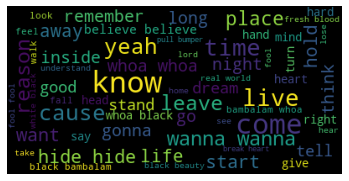

In [ ]:


if ( len( error_partition ) != 0 ):

  wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )  # Here we computed the word cloud for the wrong partitions to know more about the highest frequency words 
  wc = wc.generate(str( error_partition  ))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show(    )






# **Clustering Algorithms**

# **Bow and TF_IDF**

In [ ]:

def Bow_Tf_Idf(   new_all_partitions  ):


  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( new_all_partitions )  # we calculated  bag of words to calculate the frequency of every word of the text.
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).todense()   # we calculated the Term frequency (TF) and Inverse document Frequency (IDF)
  # X_train_tfidf.shape
  return  X_train_tfidf




# **N-gram**

In [ ]:


def ngram(book_partitions_list , n ):
  count_vect = CountVectorizer(ngram_range=(1,n)   )
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  tfidf_transformer = TfidfTransformer()
  X_train_ngrams = tfidf_transformer.fit_transform(X_train_counts)
  print( type( X_train_ngrams) )
  return  X_train_ngrams.todense()

c=ngram( new_all_partitions, 2 )
print(c.shape )




<class 'scipy.sparse.csr.csr_matrix'>
(1528, 81455)


# **LDA**

In [ ]:


def lda(book_partitions_list) :

  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  LDA = LatentDirichletAllocation( n_components=7,random_state=42 )
  LDA.fit(X_train_counts)
  X_train_LDA = LDA.transform(X_train_counts)
  # print( type(X_train_LDA  ))
  return X_train_LDA 

t=lda(  new_all_partitions )
t.shape
   
 


(1528, 7)

# **Binarizing Target**

In [ ]:



unique_labels = ['feelings'  , 'music' , 'night/time' ,  'obscene' ,  'romantic' ,  'sadness' ,  'violence' , 'world/life'  ]

def Binarizing_Target(   new_all_labels ):

  # unique_labels = np.unique( new_all_labels )

  unique_labels = ['feelings'  , 'music' , 'night/time' ,  'obscene' ,  'romantic' ,  'sadness' ,  'violence' , 'world/life'  ]

  new_all_labels = np.array( new_all_labels ) 
  for label in unique_labels:
    new_all_labels [ new_all_labels  ==  label ]  = int( unique_labels.index( label  ) ) 
  # if type(book_labels_list[0] ) is str:
  return new_all_labels





In [ ]:
new_all_labels = Binarizing_Target( new_all_labels )


## **Trying different method ( to find no .of clusters to be selected) WCSS and Elbow Method**    

In [ ]:


X_TF_IDF_features = Bow_Tf_Idf( new_all_partitions )
X_N_Gram_features = ngram(  new_all_partitions ,  2 ) 
X_LDA_features = lda(  new_all_partitions )

print( len( X_TF_IDF_features) )

 

<class 'scipy.sparse.csr.csr_matrix'>
1528


In [ ]:


pca = PCA(  n_components=2  )
X_TF_IDF_features_2D = pca.fit_transform(  X_TF_IDF_features   )
X_N_Gram_features_2d = pca.fit_transform(  X_N_Gram_features   )
X_LDA_features_2d = pca.fit_transform(  X_LDA_features   )



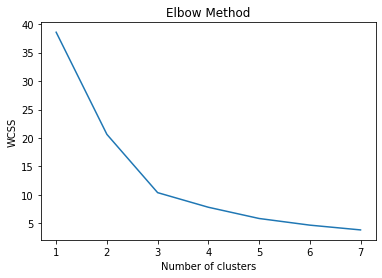

In [ ]:


wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit( X_TF_IDF_features_2D )
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 


In [ ]:

pca = PCA(  n_components=2  )
X_TF_IDF_features_2D = pca.fit_transform(  X_TF_IDF_features   )
X_N_Gram_features_2d = pca.fit_transform(  X_N_Gram_features   )
X_LDA_features_2d = pca.fit_transform(  X_LDA_features   )


# **Building K_means Model with TF_IDF , N_grams , LDA**

## **Binarizing Labels**

In [ ]:

print( new_all_labels )
new_labels = [ ] 

for x in range( len( new_all_labels) ):
  new_labels.append( int( new_all_labels[x] ) )
print( new_labels)

['6' '6' '6' ... '0' '0' '0']
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:


def Build_K_means( Data_2D ):

  kmeans = KMeans( n_clusters=8 , init='k-means++', max_iter=300, n_init=10, random_state=0)
  pred_y = kmeans.fit_predict(  Data_2D   )
  kappa=cohen_kappa_score( new_labels, pred_y )
  print(" kappa =",kappa)

  
  score = silhouette_score(X_LDA_features_2d, pred_y)
  print(" silhouette_score =",score)

  plt.scatter(  Data_2D[:,0],   Data_2D[:,1] )
  plt.scatter(  kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
  plt.show(  )

  kmeans_predict = pred_y

  return kmeans_predict


In [ ]:




from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot3d(data_2D):
  fig = plt.figure()
  ax = plt.axes(projection='3d')


  x = data_2D[:,0]
  y = data_2D[:,1]
  z = 6 * np.random.random(1000)

  ax = plt.axes(projection='3d')
  ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);


  fig = plt.figure()
  ax = plt.axes(projection='3d')


  z = data_2D[:,0]
  x = data_2D[:,1]
  y = 6 * np.random.random(1000)

  ax = plt.axes(projection='3d')
  ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
  
  

# **Plotting K_means with TF_IDF features**

 kappa = 0.004487658937920691
 silhouette_score = -0.3475324046700549


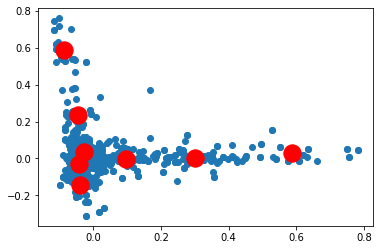

In [ ]:

kmeans_predict = Build_K_means( X_TF_IDF_features_2D )


# **Plotting K_means with N_Grams features**

 kappa = 0.0037397157816005944
 silhouette_score = -0.508188335616334


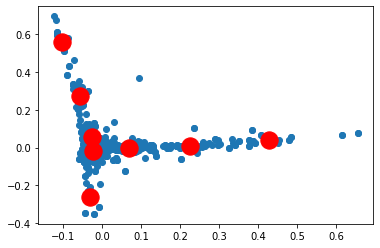

array([6, 6, 6, ..., 6, 3, 6], dtype=int32)

In [ ]:
Build_K_means( X_N_Gram_features_2d )


# **Plotting K_means with LDA features**

 kappa = -0.0777860882572925
 silhouette_score = 0.5454046317475223


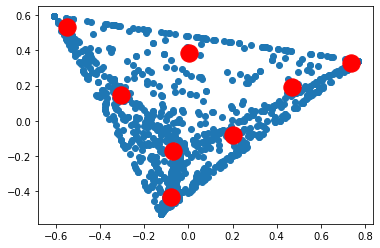

array([0, 1, 4, ..., 0, 2, 4], dtype=int32)

In [ ]:

Build_K_means( X_LDA_features_2d ) 


In [ ]:
 
 print( new_all_labels[0] )


6


# **Building EM ( Guassian Mixture) Model with TF_IDF , N_grams , LDA**

In [ ]:
 
def Convert_data_2DataFrame( X_train_feature ):
  data = pd.DataFrame(  X_train_feature )
  data.columns=["X1","X2"]
  data["cluster"]= new_labels
  # print( data.head(   ) )
  return data 



# **Plotting Actual Data with TF_IDF**

In [ ]:
data = Convert_data_2DataFrame(  X_TF_IDF_features_2D  )


# plt.figure(figsize=(9,7))
# sns.scatterplot(data=data, 
#                 x="X1",
#                 y="X2", 
#                 hue="cluster",
#                 palette=[ "Black" , "red","blue","green", "purple"])
# plt.savefig("Data_for_fitting_Gaussian_Mixture_Models_Python.png",
#                     format='png',dpi=150)


# **Building GuassianMixture Model**

In [ ]:

def Build_GaussianMixture( data ):
      
  gmm = GaussianMixture(  8 ,  covariance_type='full',  random_state=0).fit( data.iloc[ : , :2]   )
  labels = gmm.predict(   data.iloc[ : , :2]  )
  data[["predicted_cluster"]]=labels

  y_actual = data.iloc[ : , 2:3 ] 
  y_predicted = labels
  # print( y_predicted )

  arr = y_actual.to_numpy(  )
  print( arr[0 ] )


  kappa2 = cohen_kappa_score(y_actual , y_predicted  )

  print( " kappa = ",kappa2  )
 
  score = silhouette_score(X_LDA_features_2d, y_predicted)
  print(" silhouette_score =",score)


  plt.figure(figsize=(9,7))
  sns.scatterplot(data=data, 
                  x="X1",
                  y="X2", 
                  hue="predicted_cluster",
                  palette=  ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9' , 'blue' , 'green' , 'orange' ]   )
  plt.savefig("fitting_Gaussian_Mixture_Models_with_3_components_scikit_learn_Python.png",
                      format='png',dpi=150) 
     



# **Plotting Guassian Mixture Model with TF_IDF features**

[6]
 kappa =  -0.01720269259536278
 silhouette_score = -0.3245433428870167


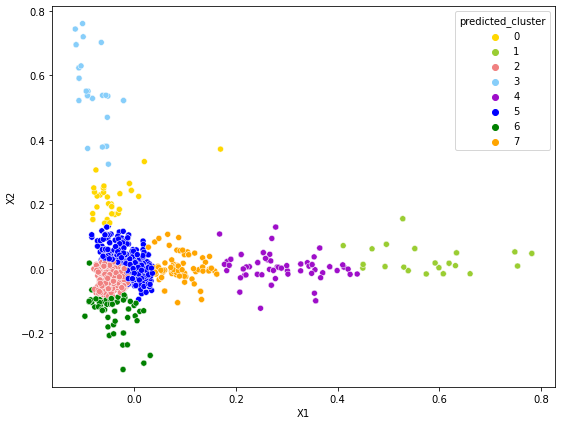

In [ ]:

data = Convert_data_2DataFrame(  X_TF_IDF_features_2D  )
Build_GaussianMixture( data ) 

# **Plotting Guassian Mixture Model with N-Grams features**

[6]
 kappa =  0.026925953627524257
 silhouette_score = -0.13695577782394916


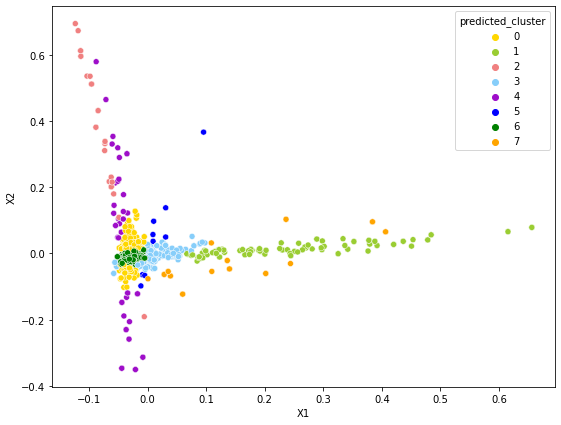

In [ ]:

data = Convert_data_2DataFrame(  X_N_Gram_features_2d  )
Build_GaussianMixture( data ) 


# **Plotting Guassian Mixture Model with LDA features**

[6]
 kappa =  0.035153328347045654
 silhouette_score = 0.19865188907718206


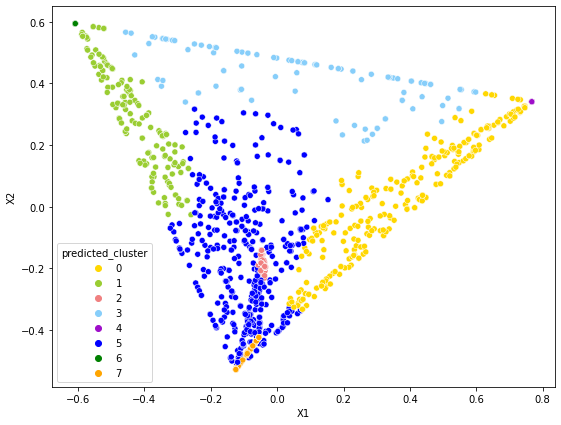

In [ ]:

data = Convert_data_2DataFrame(  X_LDA_features_2d  )
Build_GaussianMixture( data ) 


# **Building Hierarchical Model**

In [ ]:

def Build_Hierarchical_Model( z ):

  plt.figure(figsize=(10, 7))
  plt.title(" Books' partition Dendograms")
  dend = shc.dendrogram(shc.linkage(z, method='ward'))

  cluster = AgglomerativeClustering(n_clusters=8 , affinity='euclidean', linkage='ward')
  cluster.fit_predict(z)
  # print( cluster.labels_ ) 
  plt.figure(figsize=(9, 5))
  plt.scatter(z[:,0], z[:,1], c=cluster.labels_ , cmap='rainbow' )
  y_actual = data.iloc[ : , 2:3 ] 
  kappa2 = cohen_kappa_score(y_actual , cluster.labels_  )

  print( " kappa = ",kappa2  )
 
  score = silhouette_score(X_LDA_features_2d, cluster.labels_ )
  print(" silhouette_score =",score)



# **Plotting Hierarchical Model with TF_IDF**

 kappa =  0.15482423335826478
 silhouette_score = -0.460630263689926


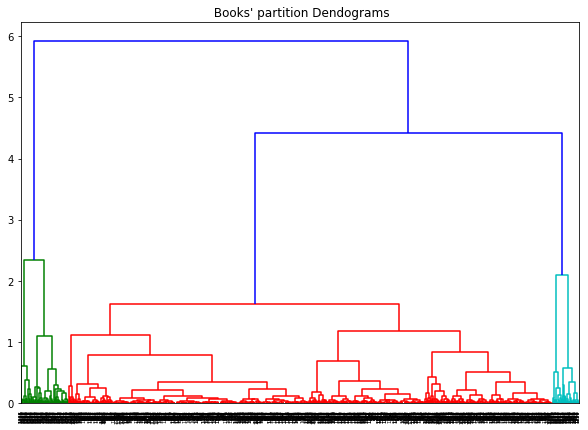

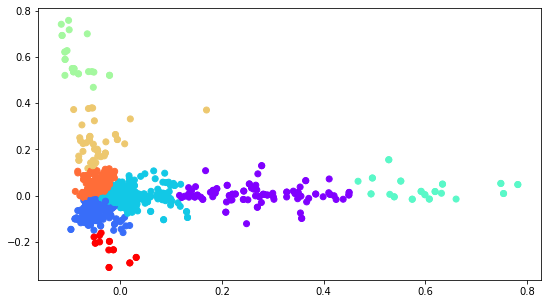

In [ ]:
Build_Hierarchical_Model(X_TF_IDF_features_2D)


# **Plotting Hierarchical Model with N_Grams**

 kappa =  -0.08825729244577407
 silhouette_score = -0.5074058106335952


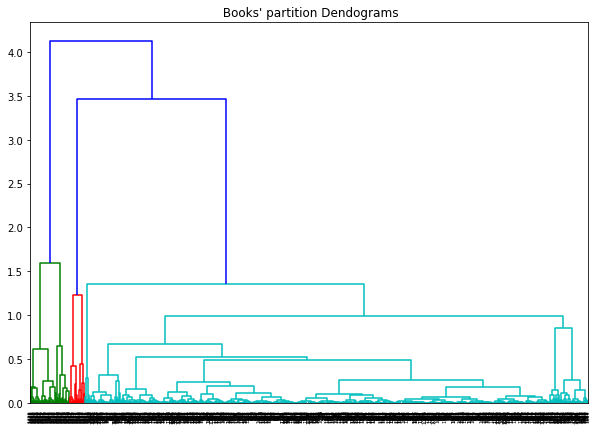

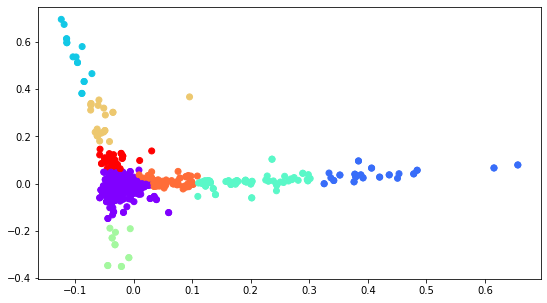

In [ ]:

Build_Hierarchical_Model(X_N_Gram_features_2d)


# **Plotting Hierarchical Model with LDA features**

 kappa =  -0.010471204188481575
 silhouette_score = 0.4674776644002546


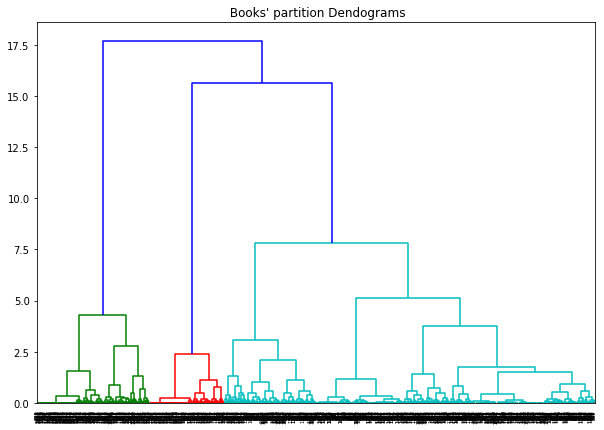

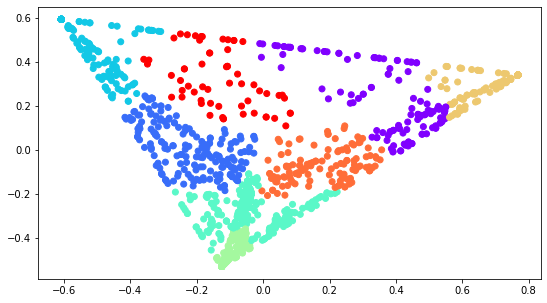

In [ ]:

Build_Hierarchical_Model(X_LDA_features_2d)


# **Error Analysis**
So After computing the Silhouette and kappa. We found that the highest kappa is the Hierarchical Model with N-grams features. Also we found that it gives the best results  So, we consider the Hierarchical clusterer as the champion Model. 

# **Our Champion Model    >>>   EM Model with LDA features**
The highest  kappa ever and best predicted labels

In [ ]:

 
def Build_Hierarchical_Model( Data_2D ):

  plt.figure(figsize=(10, 7))
  plt.title(" Books' partition Dendograms")
  dend = shc.dendrogram(shc.linkage( Data_2D, method='ward'))

  cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
  cluster.fit_predict( Data_2D)
  # print( cluster.labels_ ) 
  plt.figure(figsize=(9, 5))
  plt.scatter( Data_2D[:,0], Data_2D[:,1], c=cluster.labels_ , cmap='rainbow' )
  y_actual = data.iloc[ : , 2:3 ] 
  kappa2 = cohen_kappa_score(y_actual , cluster.labels_  )

  print( " kappa = ",kappa2  )
  score = silhouette_score(X_LDA_features_2d, cluster.labels_ )
  print(" silhouette_score =",score)

  return cluster.labels_



pca = PCA(  n_components=2  )
X_TF_IDF_features_2D = pca.fit_transform(  X_TF_IDF_features   )
X_N_Gram_features_2d = pca.fit_transform(  X_N_Gram_features   )
X_LDA_features_2d = pca.fit_transform(  X_LDA_features   )





 kappa =  -0.0762902019446523
 silhouette_score = 0.039536030812848524


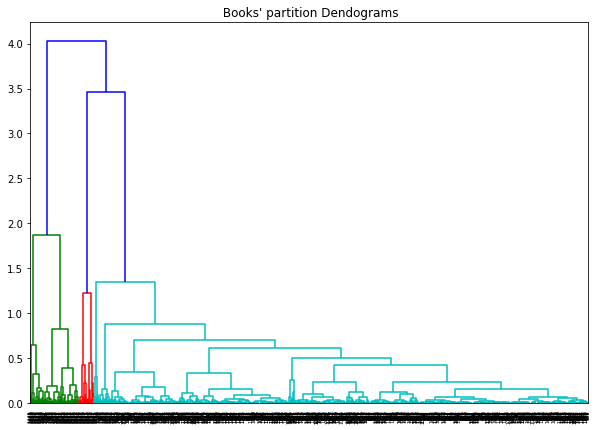

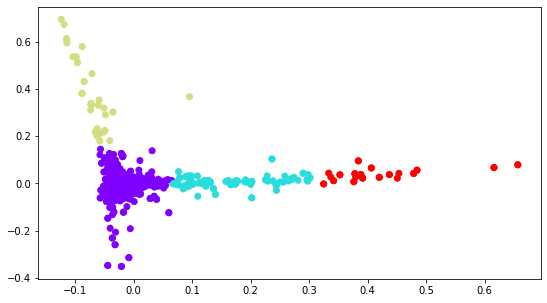

In [ ]:

y_pred = Build_Hierarchical_Model(  X_N_Gram_features_2d )


# **Detecting Misclassified Partitions**

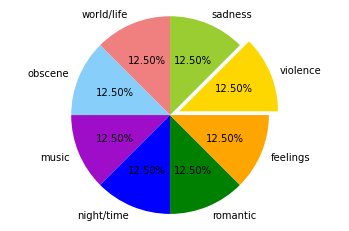

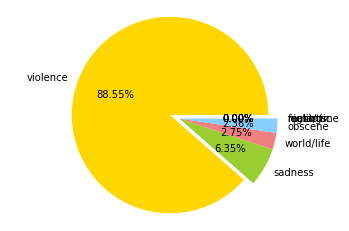

model predict violence Error  1353 
 model predict s sadness Error  97 
model predict world/life Error  42 
model predict obscene Error  36 
model predict music Error   0 
model predict night/time Error   0 
model predict romantic Error   0 
model predict feelings Error   0






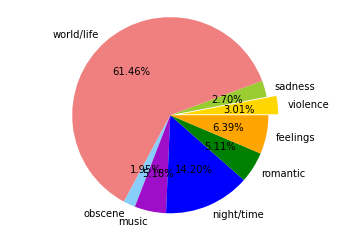

model predict violence Error  40 
 model predict s sadness Error  36 
model predict world/life Error  818 
model predict obscene Error  26 
model predict music Error   69 
model predict night/time Error   189 
model predict romantic Error   68 
model predict feelings Error   85


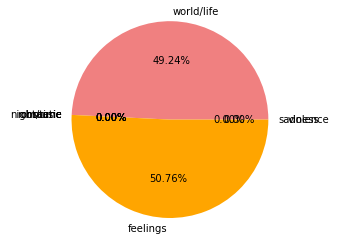

model predict violence correct   0 
model predict in sadness correct   0 
model predict world/life correct   97 
model predict in obscene correct   0 
model predict in music correct   0 
model predict in night/time correct   0 
model predict in romantic correct   0 
model predict in feelings correct  100


In [ ]:


labels = "violence" ,"sadness" , "world/life" , "obscene" , "music"  ,  "night/time"  ,  "romantic"  ,  "feelings"
sizes = [191,191,191,191,191 , 191 , 191 , 191 ]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9'  , 'blue' , 'green' , 'orange'  ]
explode = (0.1, 0,  0,  0,  0 , 0 , 0 , 0 )  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

plt.axis('equal')
plt.show( )  




#################################################################################################################
#################################################################################################################



count0,count1,count2,count3,count4  , count5 , count6 , count7 =  0, 0, 0, 0, 0 , 0 , 0 , 0

for x in range(len(y_pred)) :

  if books[  y_pred[x] ] == books[ 0]:
    count0=count0+1
  elif books[ y_pred[x] ] == books[ 1]:
    count1=count1+1
  elif books[y_pred[x]  ] == books[ 2]:
    count2=count2+1
  elif books[ y_pred[x]  ] == books[3]:
    count3=count3+1
  elif books[ y_pred[x]  ] == books[4]:
    count4=count4+1
  elif books[ y_pred[x]  ] == books[5]:
    count5=count5+1
  elif books[ y_pred[x]  ] == books[6]:
    count6=count6+1
  else:
    count7=count7+1


labels = "violence" ,"sadness" , "world/life" , "obscene" , "music"  ,  "night/time"  ,  "romantic"  ,  "feelings"
sizes = [count0,count1,count2,count3,count4  , count5 , count6 , count7]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9'  , 'blue' , 'green' , 'orange'  ]
explode = (0.1, 0, 0, 0, 0 , 0 , 0 , 0 )  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

plt.axis('equal')
plt.show( )

print("model predict violence Error ",count0,    "\n model predict s sadness Error ",count1,  "\nmodel predict world/life Error ",count2,
        "\nmodel predict obscene Error ",count3, "\nmodel predict music Error  ",count4 , "\nmodel predict night/time Error  ",count5  ,
         "\nmodel predict romantic Error  ",count6 ,   "\nmodel predict feelings Error  ",count7  )
  


print( "\n" )
print( "\n" )



###################################################################################################
###################################################################################################








error_partition =  [ ]

error_books = [ ] 
 

# books = [ "social science " ,"language& literatures","fiction","History","medicien"]
music = [ "violence" ,"sadness" , "world/life" , "obscene" , "music"  ,  "night/time"  ,  "romantic"  ,  "feelings"  ]



def detect_misclassified( actual , predicted  ):

  count0,count1,count2,count3,count4 , count5 , count6 , count7 =          0, 0, 0, 0, 0 , 0 , 0 , 0
  count8,count9,count10,count11,count12 , count13 , count14 , count15    =  0 , 0,  0, 0, 0 , 0 , 0 , 0 
  
  
  #print( len( actual ) ) 
  #print( len( predicted ) ) 
  error_partition = [ ]
  
  for x in range( len( actual ))  :
    #print(actual[x] ,  predicted[x])
    if(   actual[x] !=  predicted[x] ):

      #print( "predict as  = " ,  books[  predicted[x]  ] ,"actual = " , books[ actual[x] ]   )
      if music[  predicted[x] ] == music[ 0]:
          count0=count0+1       
      elif music[ predicted[x] ] == music[ 1]:
          count1=count1+1
      elif music[predicted[x]  ] == music[ 2]:
          count2=count2+1
      elif music[ predicted[x]  ] == music[3]:
          count3=count3+1    
      elif music[ predicted[x]  ] == music[4]:
          count4=count4+1
      elif music[ predicted[x]  ] == music[5]:
          count5=count5+1      
      elif music[ predicted[x]  ] == music[6]:
          count6=count6+1
      else:
          count7=count7+1

      error_books.append(  unique_labels[ int( predicted[x] ) ]  )
      error_partition.append( new_all_partitions[x] ) 



    else:
      #print( "predict as  = " ,  books[  predicted[x]  ] ,"actual = " , books[ actual[x] ]   )
      if(   actual[x] ==  predicted[x] ):
      #print( "predict as  = " ,  books[  predicted[x]  ] ,"actual = " , books[ actual[x] ]   )
        if music[  predicted[x] ] == music[ 0]:
            count8=count8+1
        elif music[ predicted[x] ] == music[ 1]:
            count9=count9+1
        elif music[predicted[x]  ] == music[ 2]:
            count10=count10+1
        elif music[ predicted[x]  ] == music[3]:
            count11=count11+1
        elif music[ predicted[x]  ] == music[3]:
            count12=count12+1 
        elif music[ predicted[x]  ] == music[3]:
            count13=count13+1
        elif music[ predicted[x]  ] == music[3]:
            count14 = count14+1   
        else:
            count15=count15+1



  labels = "violence" ,"sadness" , "world/life" , "obscene" , "music"  ,  "night/time"  ,  "romantic"  ,  "feelings"
  sizes = [count0,count1,count2,count3,count4, count5 , count6 , count7 ]
  colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9'  , 'blue' , 'green' , 'orange'  ]
  explode = (0.1, 0, 0, 0,0 , 0 , 0 , 0 )  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

  plt.axis('equal')
  plt.show()


      
  print("model predict violence Error ",count0,    "\n model predict s sadness Error ",count1,  "\nmodel predict world/life Error ",count2,
        "\nmodel predict obscene Error ",count3, "\nmodel predict music Error  ",count4 , "\nmodel predict night/time Error  ",count5  ,
         "\nmodel predict romantic Error  ",count6 ,   "\nmodel predict feelings Error  ",count7  )
  





  labels = "violence" ,"sadness" , "world/life" , "obscene" , "music"  ,  "night/time"  ,  "romantic"  ,  "feelings"
  sizes = [count8,count9,count10,count11 ,count12 , count13 , count14 , count15 ]
  colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9' , 'blue' , 'green' , 'orange' ]
  explode = (0.1, 0, 0, 0,0 , 0 , 0 , 0)  # explode 1st slice


  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

  plt.axis('equal')
  plt.show()

  
  print("model predict violence correct  ",count8 , "\nmodel predict in sadness correct  ",count9,"\nmodel predict world/life correct  ",count10,
        "\nmodel predict in obscene correct  ",count11, "\nmodel predict in music correct  ",count12 ,  "\nmodel predict in night/time correct  ",count13 ,
        "\nmodel predict in romantic correct  ",count14 , "\nmodel predict in feelings correct ",count15 )


  return error_partition , error_books



############################################################################################################################
############################################################################################################################



error_partition ,  error_books = detect_misclassified(  new_labels ,   kmeans_predict   )





In [ ]:
print( len( kmeans_predict))

print( len( new_labels))

1528
1528


In [ ]:

# print( new_all_partitions[0])
all_lists_text = [ ]
list_texts = [ ] 

for x in range( len(  labels )  ):

  all_lists_text.append( new_all_partitions[ x : x+191 ] )

print(all_lists_text[0][0]  )


print( len ( all_lists_text[0]    ) )



gotta raise little hell young blood like river young blood chain young blood heaven need sinner raise hell saint young blood come start riot care young blood heaven hate sinner gonna raise hell raise hell raise hell somebody gotta gotta raise little hell baby drop bone baby sell soul heaven fare thee somebody gotta gotta raise little hell hell yeah somebody gotta gotta raise little hell hell yeah somebody gotta gotta raise little hell young blood stand deliver need queen young gotta pull trigger world run scar raise hell baby drop bone baby sell soul heaven fare thee somebody gotta
191


## **Analyizing error partitions by drawing the word cloud**




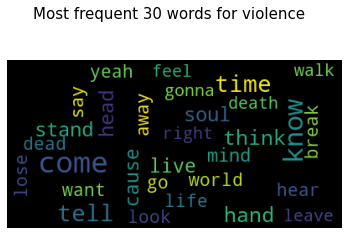

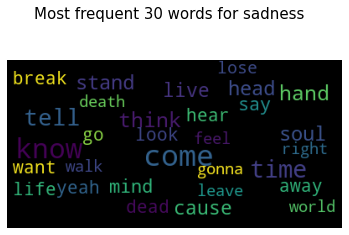

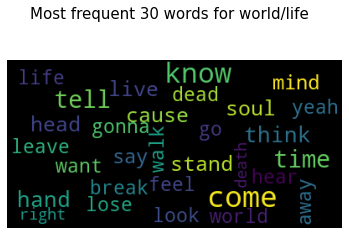

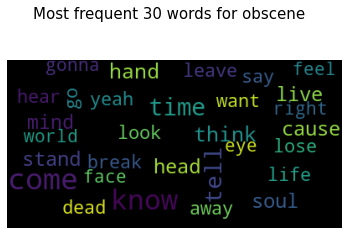

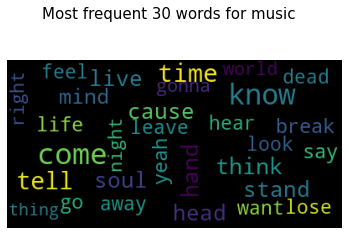

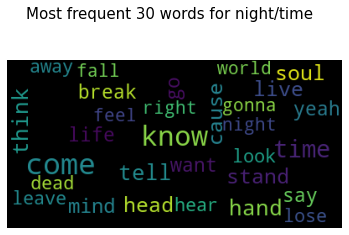

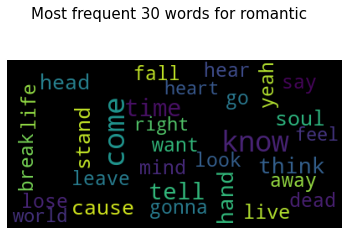

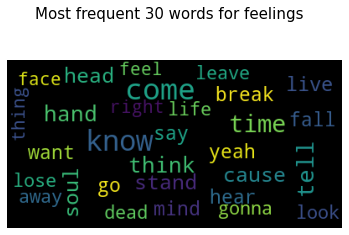

In [ ]:

for i in range(len( labels)):


  wc = wordcloud.WordCloud( background_color='black',    max_words=30 ,     max_font_size=35  )
  wc = wc.generate(str( all_lists_text[i ]  ))
  fig = plt.figure(num=1)

  plt.axis('off')
  plt.imshow(wc, cmap=None)
  fig.suptitle("Most frequent 30 words for " + labels[i] , fontsize=15)

  plt.show()

# **Analyzing our error**
By analyzing our wrong music records and finding the top 30 frequent words in each of them, we found that there is high similarities between the music records so the model couldn't cluster the music records in the right cluster due to this similarity.   